<a href="https://colab.research.google.com/github/SowjanyaKiran/sowjanya-/blob/main/coffee_shop_revenue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
#Loading the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data set/coffee_shop_revenue.csv')

In [6]:
#summerising the dataset
data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


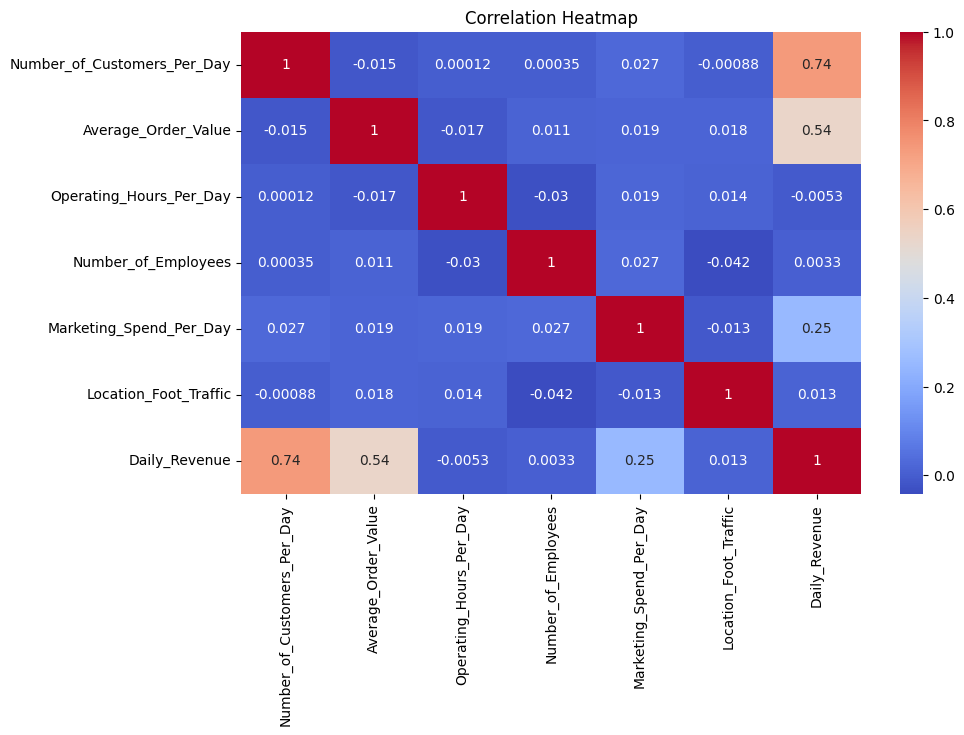

In [7]:
# Calculate correlation matrix
correlation = data.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [9]:
#preprossing the dataset
# Check for missing values and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB
None


In [10]:
# Check for missing values
print(data.isnull().sum())

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64


In [11]:
# Statistical summary
print(data.describe())

       Number_of_Customers_Per_Day  Average_Order_Value  \
count                  2000.000000          2000.000000   
mean                    274.296000             6.261215   
std                     129.441933             2.175832   
min                      50.000000             2.500000   
25%                     164.000000             4.410000   
50%                     275.000000             6.300000   
75%                     386.000000             8.120000   
max                     499.000000            10.000000   

       Operating_Hours_Per_Day  Number_of_Employees  Marketing_Spend_Per_Day  \
count              2000.000000          2000.000000              2000.000000   
mean                 11.667000             7.947000               252.614160   
std                   3.438608             3.742218               141.136004   
min                   6.000000             2.000000                10.120000   
25%                   9.000000             5.000000               13

In [12]:
#segregating the dataset into input and output
X = data.drop('Daily_Revenue', axis=1)
y = data['Daily_Revenue']

In [ ]:
print(X)

      Number_of_Customers_Per_Day  ...  Location_Foot_Traffic
0                             152  ...                     97
1                             485  ...                    744
2                             398  ...                    636
3                             320  ...                    770
4                             156  ...                    232
...                           ...  ...                    ...
1995                          372  ...                    913
1996                          105  ...                    235
1997                           89  ...                    310
1998                          403  ...                    577
1999                           89  ...                    322

[2000 rows x 6 columns]


In [13]:
print(y)

0       1547.81
1       2084.68
2       3118.39
3       2912.20
4       1663.42
         ...   
1995    2816.85
1996     337.97
1997     951.34
1998    4266.21
1999     914.24
Name: Daily_Revenue, Length: 2000, dtype: float64


In [14]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X.shape , y.shape

((2000, 6), (2000,))

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 6), (400, 6), (1600,), (400,))

In [17]:
#loading linear regression
model = LinearRegression()

In [18]:
#train the model
model.fit(X_train, y_train)

LinearRegression()

In [19]:
#test the model
y_pred = model.predict(X_test)

In [20]:
y_pred

array([3132.43762518, 1310.89926933, 2573.16188371, 2030.53864545,
       2262.57501359,  878.05869731, 1294.40945751, 3485.89809483,
        868.89395392,  822.0206912 ,  553.73525921, 1075.1966644 ,
       2288.56700186, 1695.28688966, 3465.70548524, 1967.25065021,
       3905.48668769, 2865.90926947, 3086.18088274, 2949.01533361,
       2148.04900109,  302.49760551, 3509.24477618,  787.02058301,
       2193.11866259, 2232.07663133, 2684.72756002, 3369.00441213,
       2281.93000133, 2571.51201469, 1863.56437024, 1008.25519417,
       3314.34816609, 1808.4268168 , 1996.70022927,  690.68969013,
       2399.36255382, 2369.66636816, 2555.13579137, 2228.49582771,
        834.82940004, 1527.60317378,  837.52769355, 1814.86074112,
       2656.39451367, 1556.5956663 , -146.7098274 , 2502.8356044 ,
       3339.87164717, 1162.63541201, 2023.96061591,  893.89367192,
       1422.2418364 , 2722.97545676, 1677.78651968, 2422.7037227 ,
       2404.0124544 , 1253.25135055, 1979.39479478, 1949.84720

In [21]:
y_test

,Daily_Revenue
1860,3443.69
353,1021.08
1333,2384.42
905,2198.35
1289,1988.89
...,...
965,1622.31
1284,2347.61
1739,976.49
261,1349.27


In [22]:
#evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
#evaluating the model
r2=r2_score(y_test, y_pred)
print('R2 Score:', r2*100 ,'%')

R2 Score: 89.5576840810998 %


In [24]:
# Print coefficients and intercept
print("Intercept:", model.intercept_)
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")


Intercept: -1535.5130014517792
Number_of_Customers_Per_Day: 5.5726574300569025
Average_Order_Value: 245.18094670979926
Operating_Hours_Per_Day: 0.267676665860467
Number_of_Employees: -1.773528551979636
Marketing_Spend_Per_Day: 1.536426388278727
Location_Foot_Traffic: 0.017338073551172783
